# Nearest Neighbors Regression

Nearest Neighbors 방법은 내부적으로 모델을 생성하지 않고 훈련 데이터를 저장하고 그 유사도를 측정하여 문제를 해결하는 방법입니다. 데이터의 독립변수가 거리기반으로 종속변수와 관계가 있는 데이터일 경우 사용할 수 있습니다. 

Nearest Neighbors 는 Neighbor를 선정하는 방식에 따라 K Nearest Neighbors, Radius Neighbors으로 나뉘어 집니다.

* K Nearest Neighbors: 사용자가 정의한 K 파라미터 수 만큼의 Nearest Neighbors 데이터를 이용합니다.
* Radius Neighbors: 사용가자 정의한 R 파라미터 만큼의 반경안에 존재하는 Neighbors 데이터를 이용합니다.

데이터의 분포가 Sparse 할 경우 KNN 방식은 최근접 K 개의 후보를 선정하는 것에 문제가 있기 때문에 Radius Neighbors 방식을 이용하는 것이 좋습니다.

**Weight**
기본적으로 Neighbors 의 경우 결과 값을 계산할 경우 후보 Neighbors 데이터 결과 값의 uniform 한 가중치를 적용하여 결과 값을 계산합니다. 데이터의 거리 기반으로 결과 값 계산에 다른 가중치를 주고 싶다면, weights 파라미터의 값을 'distance' 로 변경할 수 있습니다.

**Algorithm**
Neighbor를 찾기 위해 거리를 계산하는 방식을 선택 할수 있습니다. 'brute', 'kd_tree', 'ball_tree'  세가지 방법을 제공합니다. 계산 속도는 데이터 수와 차원에 의해서 결정되기 때문에 기본 값인 'auto' 로 설정되어 있으면, 이 조건에 따라 알맞은 계산 알고리즘이 선택됩니다.

In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


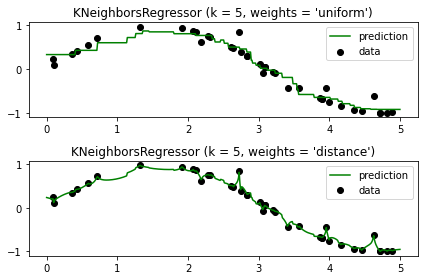

In [2]:
# 참조: https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Fabian Pedregosa <fabian.pedregosa@inria.fr>
#
# License: BSD 3 clause (C) INRIA

%matplotlib inline
# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

data shape: xs=(1000, 1), ys=(1000,)
train shape: train_xs=(700, 1), train_ys=(700,)
test shape: test_xs=(300, 1), test_ys=(300,)


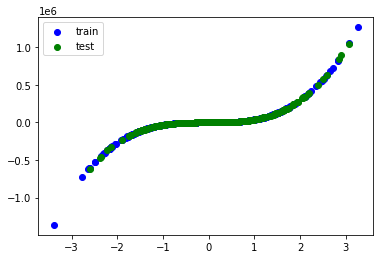


model=KNeighborsRegressor()
r_square=0.99683


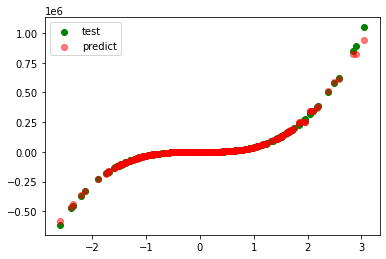


model=KNeighborsRegressor(weights='distance')
r_square=0.99883


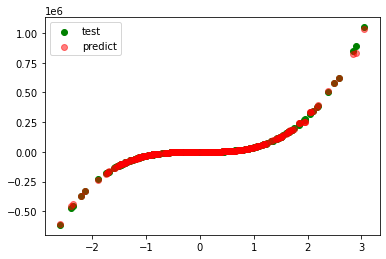


model=RadiusNeighborsRegressor(radius=0.5)
r_square=0.97245


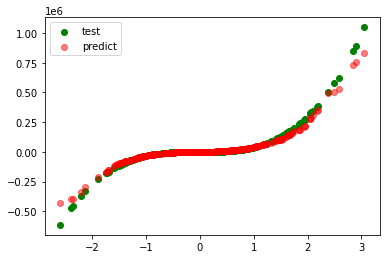


model=RadiusNeighborsRegressor(radius=0.5, weights='distance')
r_square=0.99622


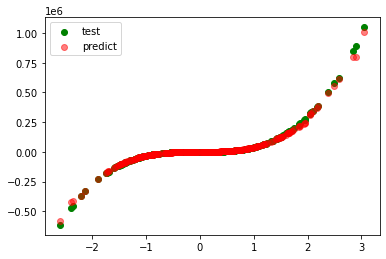

In [3]:
from sklearn import datasets, preprocessing, model_selection, neighbors, metrics

# 데이터
n_samples = 1000
xs, ys = datasets.make_regression(
    n_samples=n_samples, # 데이터 수
    n_features=1, # X feature 수
    bias=1.0, # Y 절편
    noise=0.3, # X 변수들에 더해지는 잡음의 표준 편차
    random_state=rseed) # 난수 발생용 Seed 값
ys = ys**3 # Y 차원
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, test_size=0.3, shuffle=True, random_state=2)
print(f"train shape: train_xs={train_xs.shape}, train_ys={train_ys.shape}")
print(f"test shape: test_xs={test_xs.shape}, test_ys={test_ys.shape}")
plt.scatter(train_xs, train_ys, label='train', c='b')
plt.scatter(test_xs, test_ys, label='test', c='g')
plt.legend()
plt.show()

# 모델
models = [
    neighbors.KNeighborsRegressor(5),
    neighbors.KNeighborsRegressor(5, weights='distance'),    
    neighbors.RadiusNeighborsRegressor(0.5),
    neighbors.RadiusNeighborsRegressor(0.5, weights='distance')    
]

for model in models:
    # 학습
    print(f"\nmodel={model}")
    model.fit(train_xs, train_ys)

    # 평가
    pred_ys = model.predict(test_xs)

    r_square = metrics.r2_score(test_ys, pred_ys)
    print(f"r_square={r_square:.5f}")
    
    plt.scatter(test_xs, test_ys, label='test', c='g')
    plt.scatter(test_xs, pred_ys, label='predict', c='r', alpha=0.5)
    plt.legend()
    plt.show()